Parker Pschorr

801004564

3/16/2023

ECGR 4105

Homework 2

Problem 1

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [ ]:
#Importing data from the csv file
df =pd.read_csv('/content/diabetes.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Separating out the features
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
# Separating out the target
Y = df.iloc[:,8].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

print(X[:5])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [ ]:
# Splitting data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)

In [ ]:
# Performing logistic regression on training set
classifier = LogisticRegression(random_state = None)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state = None)

LogisticRegression()

In [ ]:
# Creating a prediction array
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Determining the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7987012987012987
Precision: 0.7021276595744681
Recall: 0.66


In [ ]:
# Creating a confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[90, 14],
       [17, 33]])

Text(0.5, 257.44, 'Predicted label')

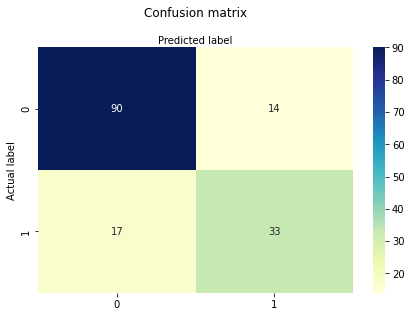

In [ ]:
# Plotting the confusion matrix using a heatmap
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')